## Customers Segmentation based on their Credit Card usage bhaviour

Dataset for this notebook consists of credit card usage behavior of customers with 18 behavioral features. Segmentation of customers can be used to define marketing strategies.


**Content of this Kernel:**
* Data Preprocessing
* Clustering using KMeans
* Interpretation of Clusters
* Visualization of Clusters using PCA

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
data= pd.read_csv("CC GENERAL.csv")
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
columns=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
        'PAYMENTS', 'MINIMUM_PAYMENTS']

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0        
    data.loc[((data[c]>0)&(data[c]<=500)),Range]=1
    data.loc[((data[c]>500)&(data[c]<=1000)),Range]=2
    data.loc[((data[c]>1000)&(data[c]<=3000)),Range]=3
    data.loc[((data[c]>3000)&(data[c]<=5000)),Range]=4
    data.loc[((data[c]>5000)&(data[c]<=10000)),Range]=5
    data.loc[((data[c]>10000)),Range]=6
 

In [4]:
columns=['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
         'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0
    data.loc[((data[c]>0)&(data[c]<=0.1)),Range]=1
    data.loc[((data[c]>0.1)&(data[c]<=0.2)),Range]=2
    data.loc[((data[c]>0.2)&(data[c]<=0.3)),Range]=3
    data.loc[((data[c]>0.3)&(data[c]<=0.4)),Range]=4
    data.loc[((data[c]>0.4)&(data[c]<=0.5)),Range]=5
    data.loc[((data[c]>0.5)&(data[c]<=0.6)),Range]=6
    data.loc[((data[c]>0.6)&(data[c]<=0.7)),Range]=7
    data.loc[((data[c]>0.7)&(data[c]<=0.8)),Range]=8
    data.loc[((data[c]>0.8)&(data[c]<=0.9)),Range]=9
    data.loc[((data[c]>0.9)&(data[c]<=1.0)),Range]=10
    

In [5]:
columns=['PURCHASES_TRX', 'CASH_ADVANCE_TRX']  

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0
    data.loc[((data[c]>0)&(data[c]<=5)),Range]=1
    data.loc[((data[c]>5)&(data[c]<=10)),Range]=2
    data.loc[((data[c]>10)&(data[c]<=15)),Range]=3
    data.loc[((data[c]>15)&(data[c]<=20)),Range]=4
    data.loc[((data[c]>20)&(data[c]<=30)),Range]=5
    data.loc[((data[c]>30)&(data[c]<=50)),Range]=6
    data.loc[((data[c]>50)&(data[c]<=100)),Range]=7
    data.loc[((data[c]>100)),Range]=8

In [6]:
data.drop(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY',  'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT' ], axis=1, inplace=True)

X= np.asarray(data)

In [7]:
data

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE
0,12,1,1,0,1,0,2,1,1,9,2,0,1,0,0,1,0
1,12,4,0,0,0,5,5,4,3,10,0,0,0,3,3,0,1
2,12,3,2,2,0,0,5,2,2,10,10,10,0,0,0,3,0
3,12,3,3,3,0,1,5,0,0,7,1,1,0,1,0,1,1
4,12,2,1,1,0,0,3,2,1,10,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,6,1,1,0,1,0,2,1,1,10,10,0,9,0,5,2,0
8946,6,1,1,0,1,0,2,1,0,10,10,0,9,0,0,2,0
8947,6,1,1,0,1,0,2,1,1,9,9,0,7,0,3,1,0
8948,6,1,0,0,0,1,1,1,1,9,0,0,0,2,3,0,1


Normalizing input values.

In [108]:
from sklearn.preprocessing import StandardScaler

col = data.columns

scale = StandardScaler()
X = scale.fit_transform(data)

X = pd.DataFrame(X, columns=[col])

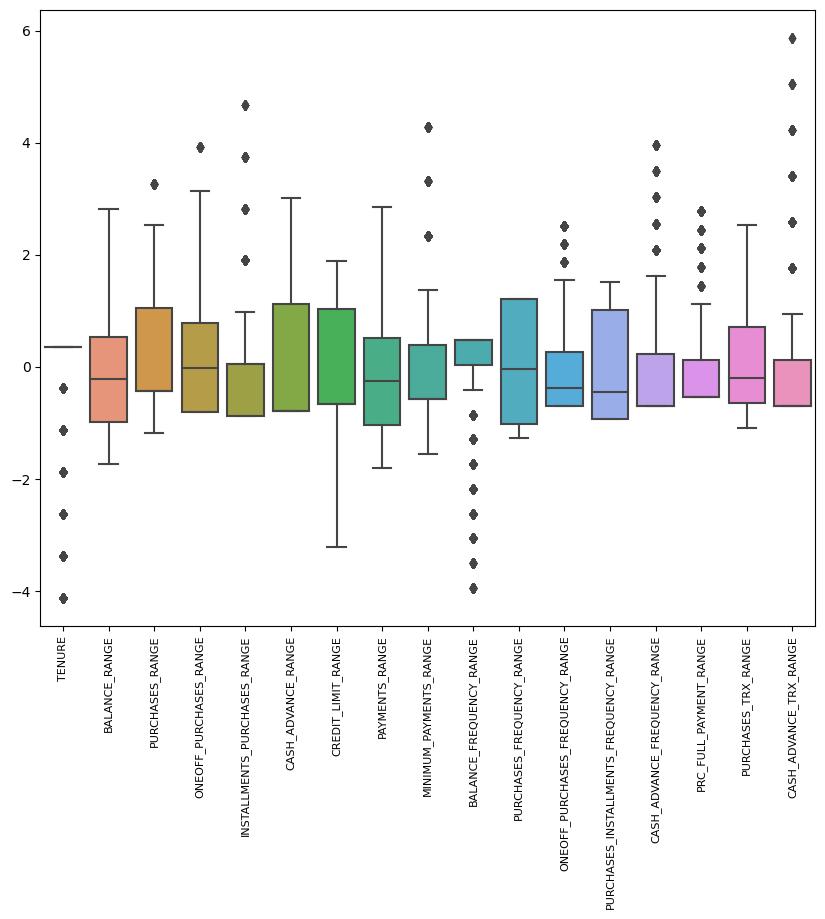

In [109]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data = X, ax = ax)
ax.set_xticklabels(col, rotation = 90, size = 8)
plt.show()

In [110]:
print(np.where(X['BALANCE_FREQUENCY_RANGE']<0.5))

(array([   0,    1,    2, ..., 8947, 8948, 8949], dtype=int64), array([0, 0, 0, ..., 0, 0, 0], dtype=int64))


In [111]:
print(np.where(data['BALANCE_FREQUENCY_RANGE']<8))

(array([   3,    9,   17, ..., 8938, 8943, 8949], dtype=int64),)


In [112]:
for i in X.columns:
    print(X[i].value_counts())

 0.360680    7584
-0.386562     365
-1.133803     236
-4.122768     204
-2.628285     196
-3.375526     190
-1.881044     175
Name: (TENURE,), dtype: int64
-0.978511    3598
 0.539152    2699
-0.219680    1122
 1.297983     769
 2.056815     616
-1.737342      80
 2.815646      66
Name: (BALANCE_RANGE,), dtype: int64
-0.438623    3086
-1.180155    2044
 1.044443    1748
 0.302910    1367
 1.785975     415
 2.527508     220
 3.269040      70
Name: (PURCHASES_RANGE,), dtype: int64
-0.802193    4302
-0.014694    2241
 1.560304    1137
 0.772805     897
 2.347803     233
 3.135302     101
 3.922801      39
Name: (ONEOFF_PURCHASES_RANGE,), dtype: int64
-0.871405    3916
 0.052218    2925
 0.975842    1027
 1.899465     928
 2.823089     101
 3.746712      41
 4.670335      12
Name: (INSTALLMENTS_PURCHASES_RANGE,), dtype: int64
-0.786629    4628
 1.114792    1464
-0.152822    1300
 0.480985     642
 1.748600     525
 2.382407     314
 3.016214      77
Name: (CASH_ADVANCE_RANGE,), dtype: int6

In [113]:
purchases_index = np.where(X['PURCHASES_RANGE']>3.22)[0]
instal_index = np.where(X['INSTALLMENTS_PURCHASES_RANGE']>2.5)[0]
min_pay_index = np.where(X['MINIMUM_PAYMENTS_RANGE']>2.3)[0]
bal_freq_index = np.where(X['BALANCE_FREQUENCY_RANGE']<-3)[0]
cash_adv_freq_index = np.where(X['CASH_ADVANCE_FREQUENCY_RANGE']>3)[0]
cash_adv_index = np.where(X['CASH_ADVANCE_TRX_RANGE']>4)[0]

In [122]:
drop_indexes = np.concatenate([purchases_index, instal_index, min_pay_index,
                               bal_freq_index, cash_adv_freq_index, cash_adv_index])
X.drop(index = drop_indexes, inplace = True)

In [123]:
X

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE
0,0.360680,-0.978511,-0.438623,-0.802193,0.052218,-0.786629,-1.512132,-1.038243,-0.581402,0.030404,-0.771610,-0.708951,-0.694434,-0.708130,-0.541199,-0.646812,-0.694622
1,0.360680,1.297983,-1.180155,-0.802193,-0.871405,2.382407,1.039128,1.293765,1.365305,0.472155,-1.264994,-0.708951,-0.939271,0.690317,0.452999,-1.099712,0.125978
2,0.360680,0.539152,0.302910,0.772805,-0.871405,-0.786629,1.039128,-0.260907,0.391952,0.472155,1.201929,2.515681,-0.939271,-0.708130,-0.541199,0.258988,-0.694622
3,0.360680,0.539152,1.044443,1.560304,-0.871405,-0.152822,1.039128,-1.815578,-1.554756,-0.853097,-1.018302,-0.386487,-0.939271,-0.241981,-0.541199,-0.646812,0.125978
4,0.360680,-0.219680,-0.438623,-0.014694,-0.871405,-0.786629,-0.661712,-0.260907,-0.581402,0.472155,-1.018302,-0.386487,-0.939271,-0.708130,-0.541199,-0.646812,-0.694622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-4.122768,-0.978511,-0.438623,-0.802193,0.052218,-0.786629,-1.512132,-1.038243,-0.581402,0.472155,1.201929,-0.708951,1.264261,-0.708130,1.115797,-0.193912,-0.694622
8946,-4.122768,-0.978511,-0.438623,-0.802193,0.052218,-0.786629,-1.512132,-1.038243,-1.554756,0.472155,1.201929,-0.708951,1.264261,-0.708130,-0.541199,-0.193912,-0.694622
8947,-4.122768,-0.978511,-0.438623,-0.802193,0.052218,-0.786629,-1.512132,-1.038243,-0.581402,0.030404,0.955237,-0.708951,0.774588,-0.708130,0.452999,-0.646812,-0.694622
8948,-4.122768,-0.978511,-1.180155,-0.802193,-0.871405,-0.152822,-2.362553,-1.038243,-0.581402,0.030404,-1.264994,-0.708951,-0.939271,0.224168,0.452999,-1.099712,0.125978
